In [79]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import seaborn as sns
import matplotlib.pyplot as plt
# import warnings
import warnings
# filter warnings
warnings.filterwarnings('ignore')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
print(os.listdir("../input"))

# Any results you write to the current directory are saved as output.

['test.csv', 'train.csv', 'sample_submission.csv']


In [80]:
# read train 
train = pd.read_csv("../input/train.csv")
print(train.shape)
train.head()

(42000, 785)


,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [81]:
# read test 
test= pd.read_csv("../input/test.csv")
print(test.shape)
test.head()

(28000, 784)


,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


### 看看数据长啥样

看训练数据集的前 $25$ 张图片。

/Users/liwei/anaconda3/envs/ipykernel_py3/lib/python3.6/site-packages/matplotlib/font_manager.py:1241: UserWarning: findfont: Font family ['STHeiti'] not found. Falling back to DejaVu Sans.
  (prop.get_family(), self.defaultFamily[fontext]))


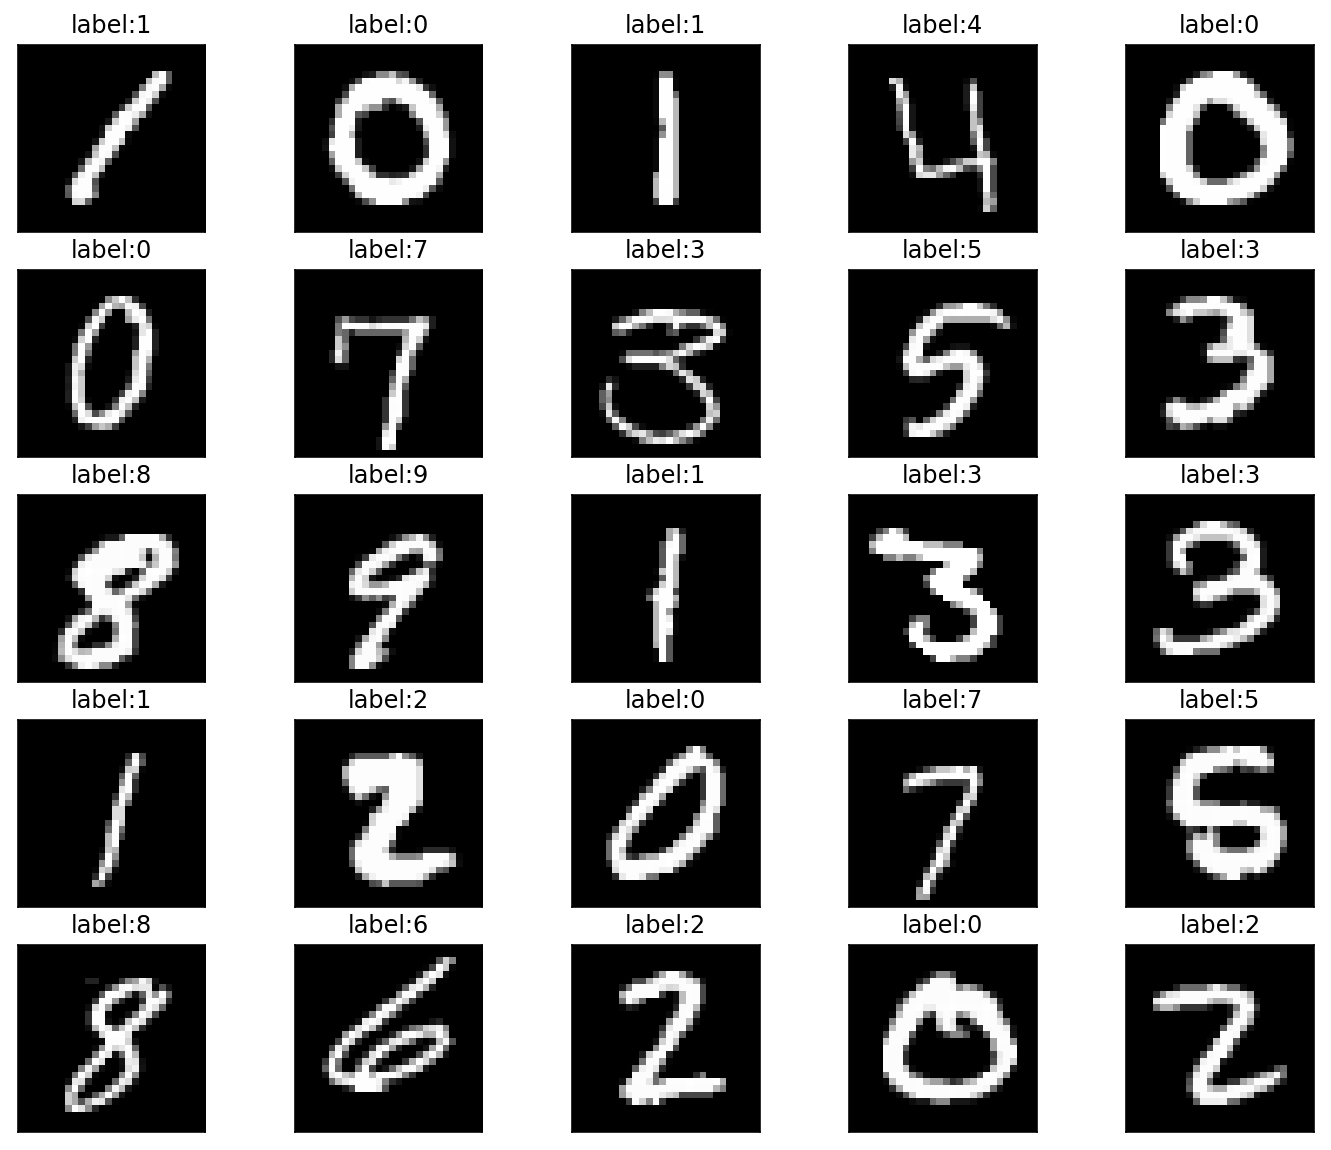

In [4]:
plt.figure(figsize=(12, 10))
for i in range(25):
    plt.subplot(5, 5, i + 1)
    plt.imshow(X_train.loc[i].values.reshape(28, 28), cmap=plt.cm.gray)
    plt.title('label:{}'.format(y_train.loc[i]))
    plt.xticks(())
    plt.yticks(())
plt.show()

In [82]:
# put labels into y_train variable
Y_train = train["label"]
# Drop 'label' column
X_train = train.drop(labels = ["label"],axis = 1) 

In [25]:
y_train.min(), y_train.max()

(0, 9)

In [84]:
import seaborn as sns

1    4684
7    4401
3    4351
9    4188
2    4177
6    4137
0    4132
4    4072
8    4063
5    3795
Name: label, dtype: int64

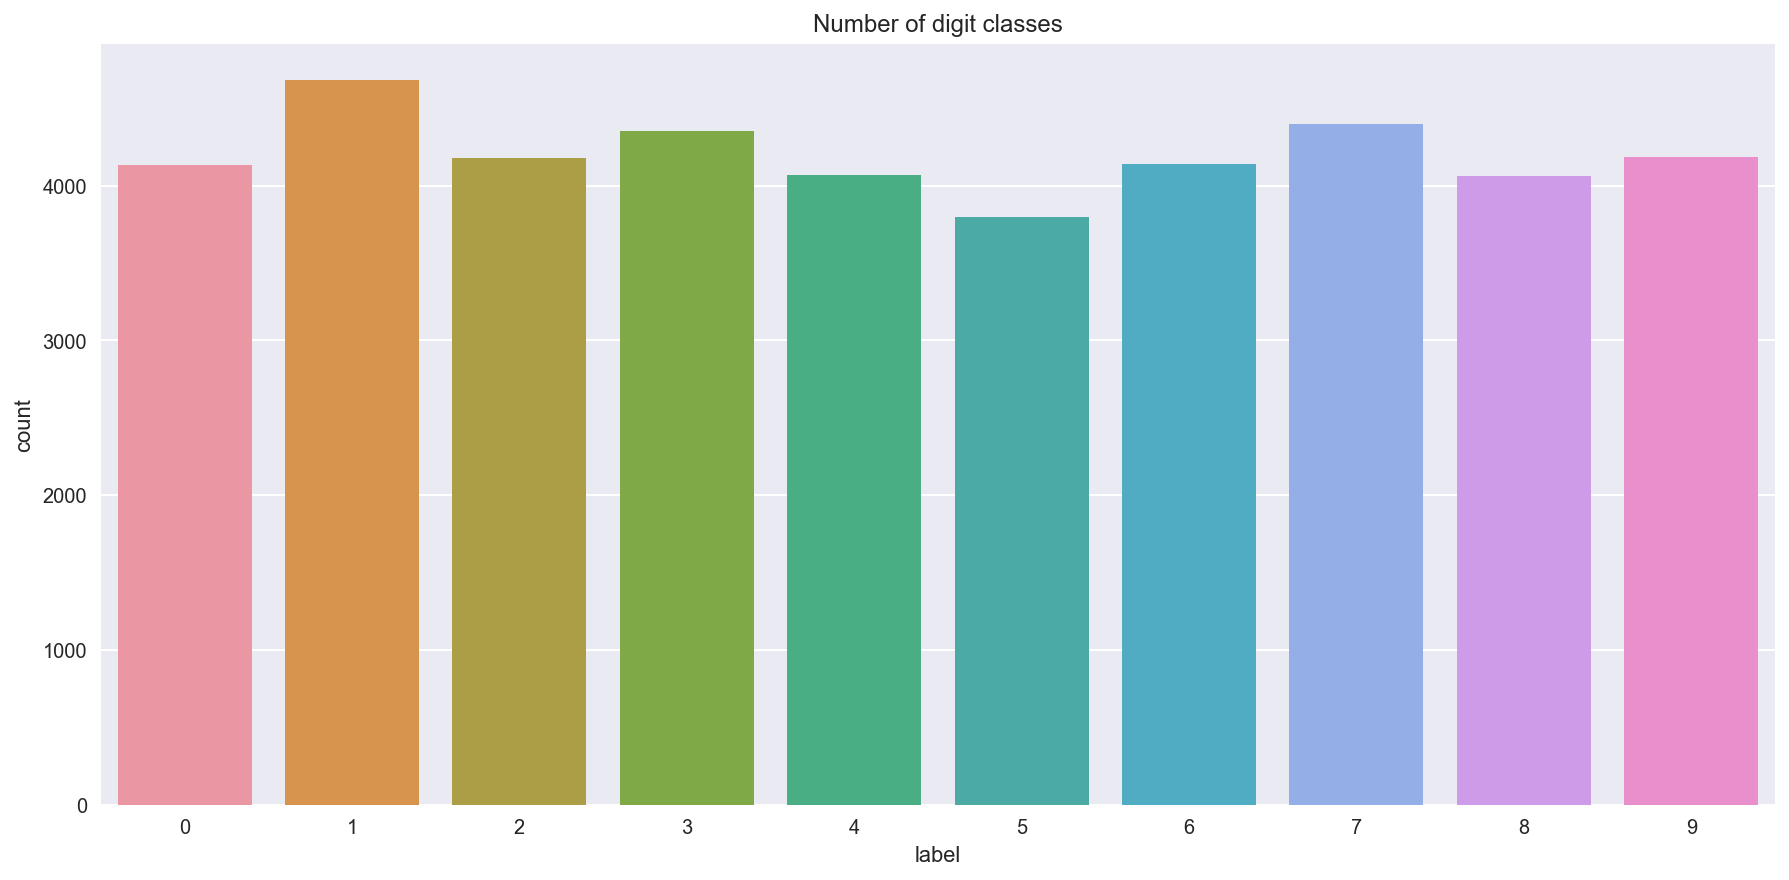

In [86]:
# visualize number of digits classes
plt.figure(figsize=(15,7))
g = sns.countplot(Y_train)
plt.title("Number of digit classes")
Y_train.value_counts()

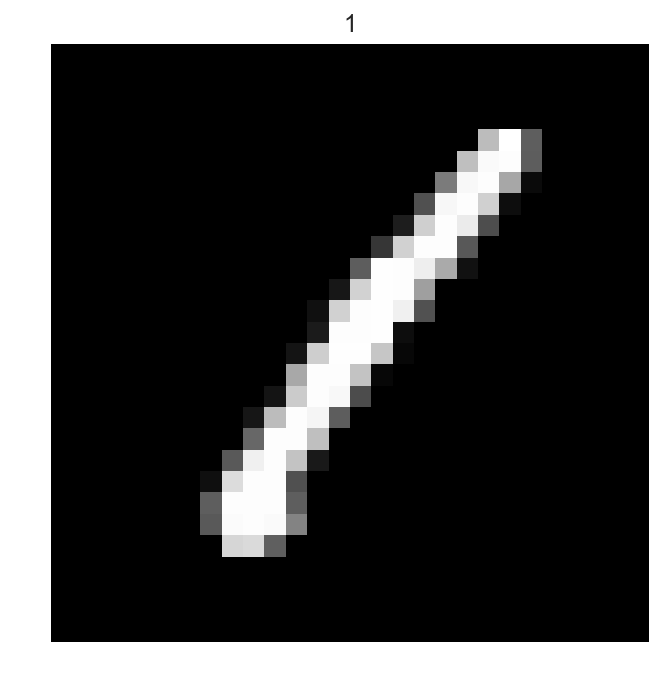

In [87]:
# plot some samples
img = X_train.iloc[0].as_matrix()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[0,0])
plt.axis("off")
plt.show()

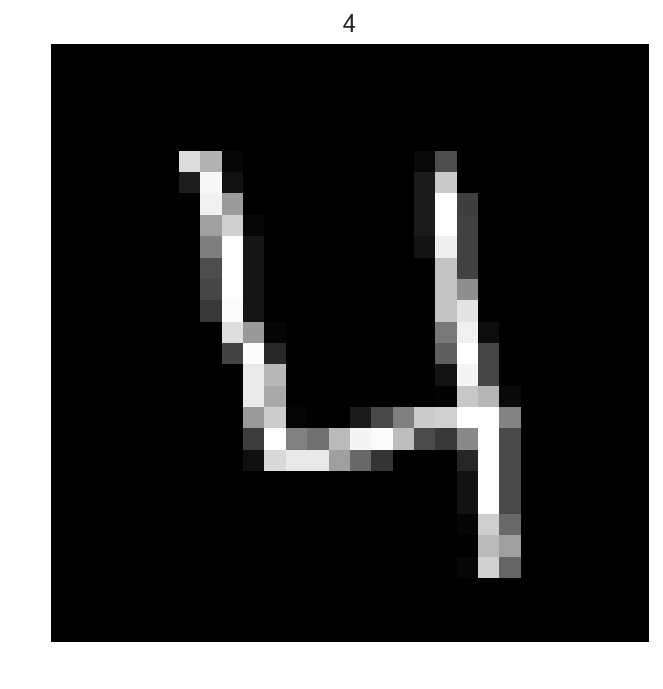

In [88]:
# plot some samples
img = X_train.iloc[3].as_matrix()
img = img.reshape((28,28))
plt.imshow(img,cmap='gray')
plt.title(train.iloc[3,0])
plt.axis("off")
plt.show()

In [89]:
# Normalize the data
X_train = X_train / 255.0
test = test / 255.0
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 784)
test shape:  (28000, 784)


In [90]:
# Reshape
X_train = X_train.values.reshape(-1,28,28,1)
test = test.values.reshape(-1,28,28,1)
print("x_train shape: ",X_train.shape)
print("test shape: ",test.shape)

x_train shape:  (42000, 28, 28, 1)
test shape:  (28000, 28, 28, 1)


### 把 y 独热编码

In [91]:
# Label Encoding
from keras.utils.np_utils import to_categorical  # convert to one-hot-encoding
Y_train = to_categorical(Y_train, num_classes=10)

In [92]:
# Split the train and the validation set for the fitting
from sklearn.model_selection import train_test_split
X_train, X_val, Y_train, Y_val = train_test_split(X_train, Y_train, test_size = 0.1, random_state=2)
print("x_train shape",X_train.shape)
print("x_test shape",X_val.shape)
print("y_train shape",Y_train.shape)
print("y_test shape",Y_val.shape)

x_train shape (37800, 28, 28, 1)
x_test shape (4200, 28, 28, 1)
y_train shape (37800, 10)
y_test shape (4200, 10)


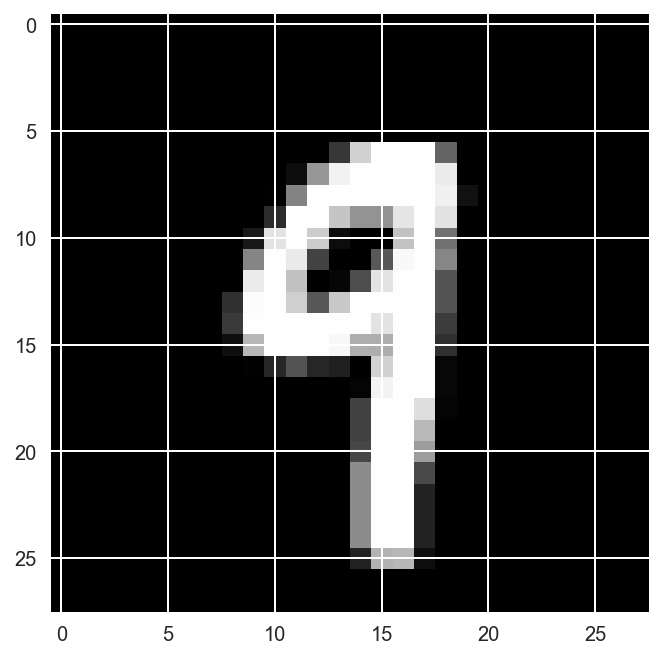

In [93]:
# Some examples
plt.imshow(X_train[2][:,:,0],cmap='gray')
plt.show()

In [94]:
from sklearn.metrics import confusion_matrix
import itertools

from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
from keras.optimizers import RMSprop,Adam
from keras.preprocessing.image import ImageDataGenerator
from keras.callbacks import ReduceLROnPlateau

model = Sequential()
#
model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
                 activation ='relu', input_shape = (28,28,1)))
model.add(MaxPool2D(pool_size=(2,2)))
model.add(Dropout(0.25))
#
model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
                 activation ='relu'))
model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
model.add(Dropout(0.25))
# fully connected
model.add(Flatten())
model.add(Dense(256, activation = "relu"))
model.add(Dropout(0.5))
model.add(Dense(10, activation = "softmax"))

In [96]:
# Compile the model
model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])

In [97]:
epochs = 10  # for better result increase the epochs
batch_size = 250

In [98]:
# data augmentation
datagen = ImageDataGenerator(
        featurewise_center=False,  # set input mean to 0 over the dataset
        samplewise_center=False,  # set each sample mean to 0
        featurewise_std_normalization=False,  # divide inputs by std of the dataset
        samplewise_std_normalization=False,  # divide each input by its std
        zca_whitening=False,  # dimesion reduction
        rotation_range=0.5,  # randomly rotate images in the range 5 degrees
        zoom_range = 0.5, # Randomly zoom image 5%
        width_shift_range=0.5,  # randomly shift images horizontally 5%
        height_shift_range=0.5,  # randomly shift images vertically 5%
        horizontal_flip=False,  # randomly flip images
        vertical_flip=False)  # randomly flip images

datagen.fit(X_train)

## 数据增强

In [99]:
# Fit the model
history = model.fit_generator(datagen.flow(X_train,Y_train, batch_size=batch_size),
                              epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)

Epoch 1/10
151/151 [==============================] - 13s 85ms/step - loss: 2.1835 - acc: 0.1912 - val_loss: 1.7430 - val_acc: 0.4531
Epoch 2/10
151/151 [==============================] - 12s 82ms/step - loss: 1.9172 - acc: 0.3106 - val_loss: 1.2488 - val_acc: 0.6660
Epoch 3/10
151/151 [==============================] - 12s 78ms/step - loss: 1.7278 - acc: 0.3914 - val_loss: 0.9215 - val_acc: 0.7619
Epoch 4/10
151/151 [==============================] - 11s 75ms/step - loss: 1.6145 - acc: 0.4365 - val_loss: 0.7233 - val_acc: 0.8445
Epoch 5/10
151/151 [==============================] - 12s 76ms/step - loss: 1.5445 - acc: 0.4631 - val_loss: 0.6753 - val_acc: 0.8150
Epoch 6/10
151/151 [==============================] - 12s 77ms/step - loss: 1.4791 - acc: 0.4894 - val_loss: 0.5560 - val_acc: 0.8590
Epoch 7/10
151/151 [==============================] - 11s 76ms/step - loss: 1.4391 - acc: 0.5044 - val_loss: 0.4628 - val_acc: 0.9036
Epoch 8/10
151/151 [==============================] - 12s 76ms

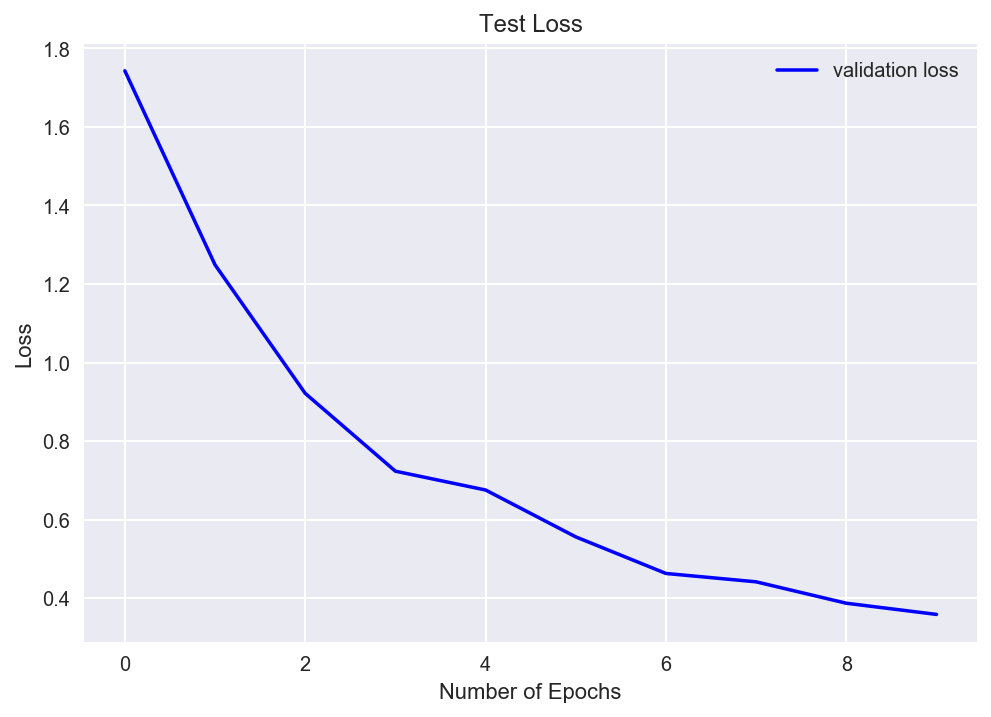

In [100]:
# Plot the loss and accuracy curves for training and validation 
plt.plot(history.history['val_loss'], color='b', label="validation loss")
plt.title("Test Loss")
plt.xlabel("Number of Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [111]:
# Predict the values from the validation dataset
Y_pred = model.predict(X_val)
Y_pred

array([[2.6563503e-02, 3.3737449e-06, 3.1153846e-03, ..., 9.3430765e-09,
        1.7985439e-02, 2.6317146e-05],
       [8.3773835e-03, 4.9849528e-05, 5.6139037e-02, ..., 4.0553391e-02,
        1.2735645e-01, 7.4099416e-01],
       [5.0228955e-03, 3.7454964e-05, 1.7486624e-02, ..., 1.5266905e-04,
        1.7159510e-02, 2.8013135e-03],
       ...,
       [8.4812967e-03, 1.7793162e-04, 7.7634197e-01, ..., 4.9478039e-02,
        5.8349110e-02, 6.0141110e-03],
       [1.2515703e-01, 1.3770183e-04, 9.7690821e-02, ..., 1.5401254e-04,
        3.3459702e-01, 6.5022055e-03],
       [7.8423655e-01, 2.4013834e-03, 1.3178450e-02, ..., 2.6096852e-04,
        5.2201901e-02, 2.7789667e-02]], dtype=float32)

In [112]:
Y_pred_class = model.predict_classes(X_val)
Y_pred_class

array([6, 9, 5, ..., 2, 5, 0])

In [113]:
# Convert predictions classes to one hot vectors 
Y_pred_classes_2 = np.argmax(Y_pred,axis = 1) 

In [114]:
Y_pred_classes_2

array([6, 9, 5, ..., 2, 5, 0])

In [116]:
sum(Y_pred_class == Y_pred_classes_2)

4200

In [117]:
Y_pred_class.shape

(4200,)

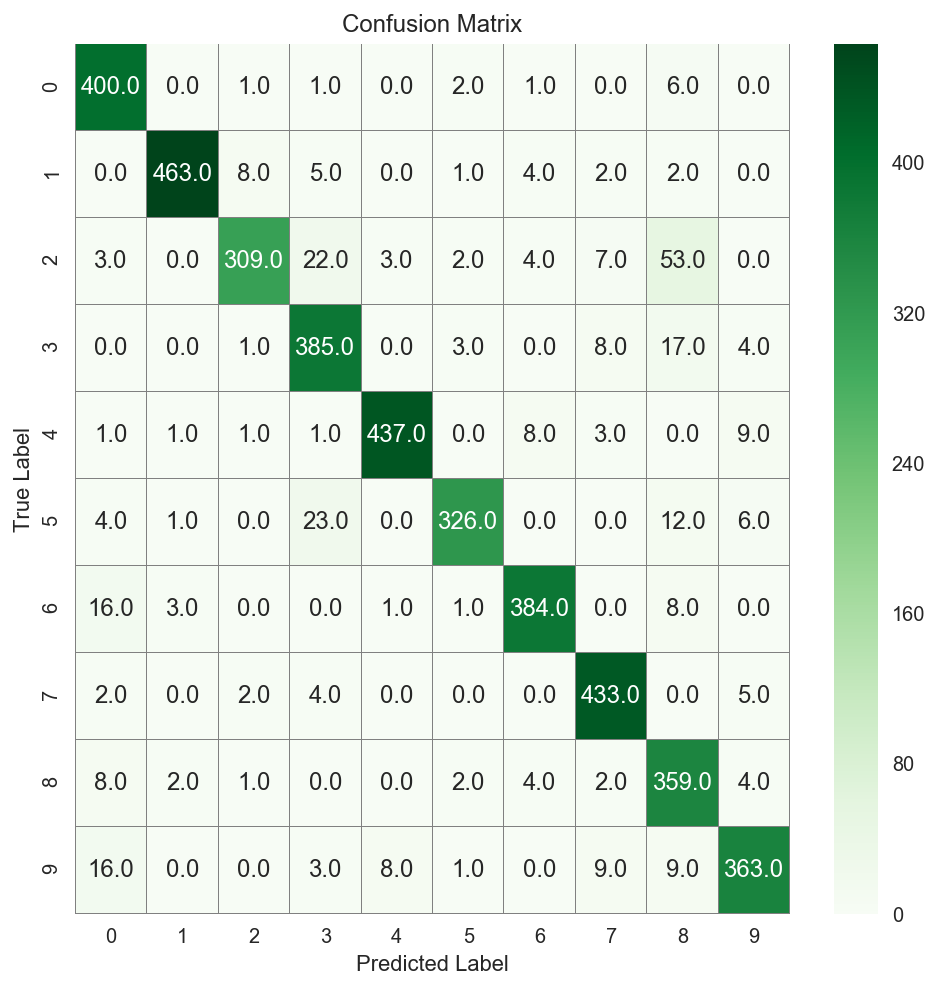

In [101]:
# confusion matrix
import seaborn as sns


# Convert validation observations to one hot vectors
Y_true = np.argmax(Y_val,axis = 1) 
# compute the confusion matrix
confusion_mtx = confusion_matrix(Y_true, Y_pred_classes) 
# plot the confusion matrix
f,ax = plt.subplots(figsize=(8, 8))
sns.heatmap(confusion_mtx, annot=True, linewidths=0.01,cmap="Greens",linecolor="gray", fmt= '.1f',ax=ax)
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

In [104]:
y_predict = model.predict_classes(X_test)

In [107]:
np.unique(y_predict)

array([0, 4, 6, 8, 9])

In [122]:
submission = pd.DataFrame({'ImageId': range(1, 28001), 'Label': y_predict})

In [124]:
submission.to_csv('submission.csv', index=None)

In [128]:
submission['Label'].value_counts()

8    25817
6      880
9      852
4      331
0      120
Name: Label, dtype: int64